# Projet numérique : câble sous-marin

## Questions théoriques 

1. La loi forte des grands nombres, applicable si on considère que les variables conditionnelles simulées suivent une même loi, sont indépendantes et intégrables, nous permet d'estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles. 

2. La loi conditionnelle suivie par le vecteur des composantes de Z non observées connaissant les valeurs d'observations est une loi gaussienne. En effet, si on se ramène au cours de Probabilité IV, sur la partie des vecteurs gaussiens à densité, en réordonnant l'ordre des valeurs connues on peut se ramener à la démonstration de la loi page 12. 

3. Soient R une matrice $ p\times p $ et $m$ un vecteur de taile p. Si Y = (Y1, Y2, ..., Yp) a des composantes gaussiennes indépendantes suivant la loi normale centrée réduite, alors nous avons vu lors de ce dernier chapitre que $Z = m + RY$ suit une loi gaussienne d'espérance $m$ et de matrice de covariance $ C = R^2 $.

4. Ainsi, pour effectuer la simulation conditionnelle on peut proposer l'algorithme suivant : 

(1) On simule des variables gaussiennes centrées réduites grâce à la simulation de 2 variables uniformes comme présenté en page 11 du chapitre. On obtient le vecteur gaussien Y de la question 3.

(2) On prend la combinaison linéaire de ces variables de la forme : 
$$Z = m+RY$$ 
$$avec$$ $$  m = (\mu , \mu, ..., \mu) $$ $$et$$  $$R = \Sigma^{1/2}$$
Ce qui est possible car $\Sigma$ est définie positive

(3) On vérifie que les profondeurs censées être connues correspondent : si c'est le cas on garde le vecteur simulé, sinon on le rejette. 


## Implémentation

In [4]:
#Chargement des dépendances
import numpy as np
import math
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101
Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization= discretization_indexes*Delta

#Paramètres du modèle
mu=-5
a=50
sigma2=12

#Données
observation_indexes=[0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))




1. Ecrire une fonction de $a$ et de $sigma^2$ et de la distance entre deux points qui donne leur covariance. 

En reprenant la formule de $C$ de l'énoncé, on définit : 


In [5]:
def Cov(h, a, sigma2) :
    return sigma2 * np.exp(-np.abs(h)/a)


2. Définition de la matrice de distance qui calcule la distance de chaque point par rapport à tous les autres. Elle est bien sure réelle, symétrique et positive. 

In [6]:
mat_dist= np.zeros((N, N))
for i in range(N) : 
    for j in range(N) : 
        mat_dist[i][j] = np.abs(discretization[i]-discretization[j])
print(mat_dist)
        

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


3. Calcul de la matrice de covariance du vecteur $Z=(Z(x_0),...Z(x_N))$

In [7]:
covar_Z = Cov(mat_dist, a, sigma2)
print(covar_Z, np.shape(covar_Z))

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]] (101, 101)


4. 3 matrices de covariance

In [8]:
#Initialisation

l=len(observation_indexes)
covar_obs=np.zeros((l,l))
covar_obs_inconnu=np.zeros((N-l,l))
covar_inconnu=np.zeros((N-l,N-l))

#Calcul

for i in range(l):
    for j in range(l):
        covar_obs[i][j]=covar_Z[observation_indexes[i]][observation_indexes[j]]

for i in range(N-l):
    for j in range(l):
        covar_obs_inconnu[i][j]=covar_Z[unknown_indexes[i]][observation_indexes[j]]
        
for i in range(N-l):
    for j in range(N-l):
        covar_inconnu[i][j]=covar_Z[unknown_indexes[i]][unknown_indexes[j]]

5. Calcul de l'espérance conditionnelle des composantes non observées connaissant les observations. 

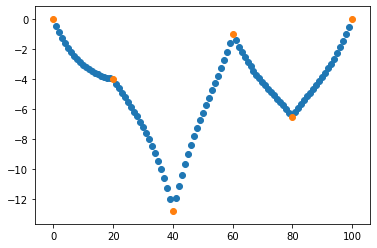

In [9]:
# En utilisant la formule de la question 2 de la partie I
# d'abord, il faut inverser la matrice cov_obs
covar_obs_inv=np.linalg.inv(covar_obs)

#on initialise nos deux vecteurs avec les valeurs de la moyenne
a = np.full(N-l,mu)  
b= np.full(l,mu)

#avec la formule du cours

esp_cond = a + np.dot(np.dot(covar_obs_inconnu,covar_obs_inv),(depth-b))

# réprésentation

plt.scatter(unknown_indexes, esp_cond)
plt.scatter(observation_indexes, depth)

6. Calcul de la matrice de variance conditionnelle grâce à la formule du cours de proba V. 


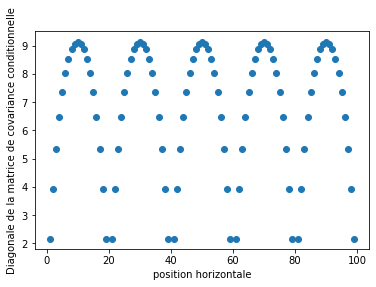

In [11]:
covar_conditionnelle = covar_inconnu-np.matmul(np.matmul(covar_obs_inconnu,covar_obs_inv),np.transpose(covar_obs_inconnu))
Liste=[]
for i in range(N-l):
    Liste.append(covar_conditionnelle[i][i])
plt.scatter(np.asarray(unknown_indexes),Liste)
plt.ylabel("Diagonale de la matrice de covariance conditionnelle")
plt.xlabel("position horizontale")
plt.show()



7. Nous réalisons une simulation conditionnelle en utilisant la décomposition de Cholesky vu que l'on cherche à simuler une variable gaussienne.

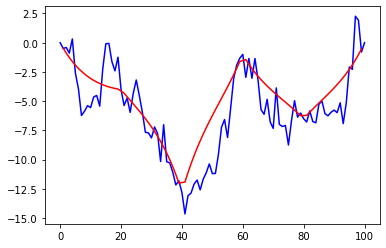

In [16]:
#On simule un vecteur gaussien de bonne dimension. 
Z=np.random.normal(0,1,95) 
#A l'aide de la question 3, on simule conditionnellement le vecteur des profondeurs inconnues
depth_unknown = esp_cond + np.dot(np.linalg.cholesky(covar_conditionnelle), Z) 

#on va créer un vecteur des profondeurs dans lequel on insère nos valeurs connues
depth_entier = list(depth_unknown)
for i in observation_indexes :
    depth_entier = depth_entier[:i] + [depth[i//20]] + depth_entier[i:]

D = np.array(depth_entier) 

plt.plot(np.linspace(0,100,101), D, color = 'blue')
plt.plot(unknown_indexes, esp_cond, color = 'red') 

8. Fonction qui calcule la longueur du câble 

In [8]:
def long(pas_dis, vect_depth) :
    L=0
    for i in range(len(vect_prof)-1) : 
        L= L+ np.sqrt(pas_dis**2 + (vect_depth[i+1]-vect_depth[i])**2)
    return L
        

In [ ]:
# avec la méthode de Box-Muller dans le cas d'un nombre non fixe de simulation
import random as rd

#H=np.around(covar_conditionnelle,6)

L=np.linalg.cholesky(covar_conditionnelle)

k=len(observation_indexes)
def sim(nbre):
    simulation=[]
    for i in range(nbre):
        U=[]
        V=[]
        for u in range(N-k):
            U.append(np.sqrt(-2*np.log(rd.random()))*np.cos(2*np.pi*rd.random()))
        V=esp_cond+np.dot(L,U)
        simulation.append(V)
    return simulation

#Dans le cas précis, nbre=100
simulation_100=sim(100)



In [ ]:
#Il nous faut une fonction qui prenne en compte toutes nos données sur la profondeur. 
def depth_entier(données):
    l=[]
    for i in données:
        l.append(i)
    for i in range(len(observation_indexes)):
        l.insert(observation_indexes[i],depth[i])
    return l

In [ ]:
# en ce qui concerne les comparaisons 
#l’espérance conditionnelle (estimée) de la longueur
esp_cond_long=0
for i in simulation_100:
    esp_cond_long= esp_cond_long + longueur(5,depth_entier(i))#on complete avec toutes les profondeurs et on calcule la longueur
esp_cond_long=esp_cond_long/100
#la longueur de l’espérance conditionnelle
long(5,depth_entier(esp_cond),5)


In [ ]:
def Suite(long,nbre) :
    M_n=[]
    for i in range(nbre+1) : 
        M_n = [np.average(Long[:i]) for i in range(1, nbre+1)]
    
ax.set_xlabel("Nombre de simulations")
ax.set_ylabel("Longueur moyenne")
ax.plot(Valeur_n, M_n)

In [ ]:
SOMME = []
for i in Simulation_de_100:
    SOMME.append(5,long(complete_profondeur(i))
        
plt.hist(Tot_cordes, range = (510, 540), bins = 8, color = 'red')
plt.xlabel('longueur de câble')
plt.ylabel('nombres de câble')
plt.title('Histogramme des longueurs')
plt.show()

In [ ]:
def lissage(L, pas):
    L.sort()
        
Liste_longueur_lissee = lissage(L, 0.2)

plt.figure()
plt.hist(Liste_longueur_lissee)
plt.title("Longueurs de câbles générées")
plt.show()